<a href="https://colab.research.google.com/github/valid999/Medical_images/blob/main/Breast_Canser_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast cancer classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

## Data Collection & Processing

In [10]:
# Loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [14]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [15]:
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [19]:
len(data_frame)

569

In [18]:
# adding the target column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [21]:
breast_cancer_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [20]:
data_frame['label']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64

In [22]:
data_frame.shape

(569, 31)

In [23]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [24]:
# Checking the missing values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [25]:
# Statistical measures about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [26]:
# Checking the distribution of Target varibale
data_frame['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

## 1 -> Benign
## 0 -> Malignant

In [30]:
data_frame.groupby('label').sum()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,3702.120,4580.24,24457.46,207415.8,21.81448,30.77981,34.084240,18.653880,40.8967,13.28818,...,4480.580,6215.46,29970.51,301524.7,30.70719,79.46271,95.528380,38.634310,68.5752,19.40435
1,4336.309,6395.57,27872.92,165216.1,33.01452,28.59021,16.442571,9.181114,62.1844,22.44366,...,4776.589,8394.88,31061.12,199527.1,44.61054,65.21410,59.346867,26.576631,96.4778,28.36082


In [31]:
X = data_frame.drop(columns = 'label' , axis = 1)
Y = data_frame['label']


In [33]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


## Spiliting the data

In [34]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 2)

In [36]:
print(X.shape , X_train.shape , X_test.shape)

(569, 30) (455, 30) (114, 30)


## Standardize the data

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## Building the Neural Network
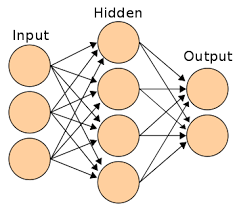

In [42]:
# Importing tensorflow and keras

import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [44]:
# Setting up the layers of Neural Network
X.shape # The shape of the input data is 30

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (30 , )),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(2 , activation = 'sigmoid')
])

In [45]:
# Compile the Neural Network


model.compile(optimizer = 'adam' ,
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [51]:
# Training the Meural Network

history = model.fit(X_train_std , Y_train , validation_split = 0.1 , epochs = 10)

Epoch 1/10
13/13 [==============================] - 0s 7ms/step - loss: 0.0500 - accuracy: 0.9902 - val_loss: 0.0555 - val_accuracy: 0.9565
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.0491 - accuracy: 0.9902 - val_loss: 0.0557 - val_accuracy: 0.9565
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0483 - accuracy: 0.9902 - val_loss: 0.0551 - val_accuracy: 0.9565
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.0473 - accuracy: 0.9902 - val_loss: 0.0551 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0463 - accuracy: 0.9902 - val_loss: 0.0542 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0455 - accuracy: 0.9902 - val_loss: 0.0542 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.0447 - accuracy: 0.9902 - val_loss: 0.0542 - val_accuracy: 0.9565
Epoch 8/10
13/13 [==

## Visualizing accuracy and loss


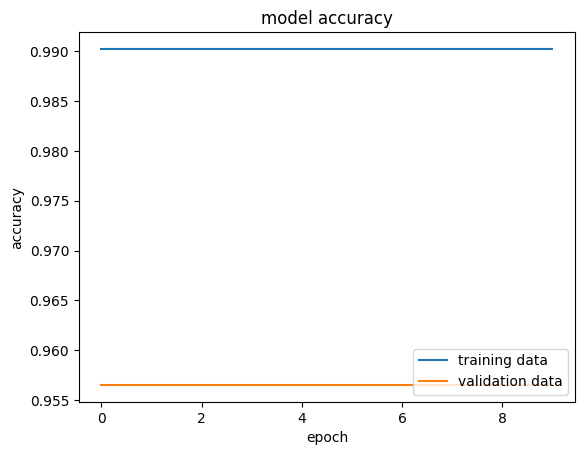

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data' , 'validation data'] , loc = 'lower right')

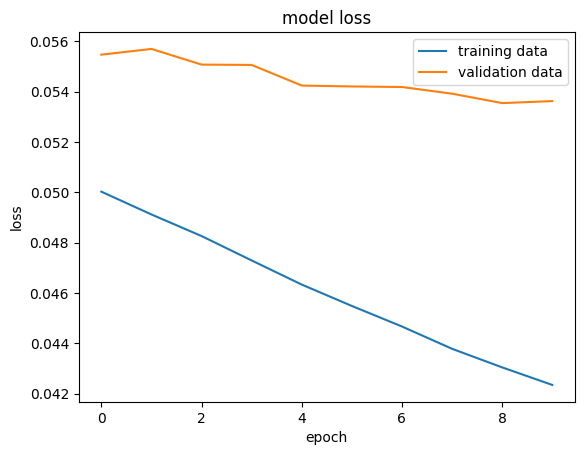

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data' , 'validation data'] , loc = 'upper right')

## Accuracy of the model on the test data

In [54]:
loss , accuracy = model.evaluate(X_test_std , Y_test)
print(accuracy)

4/4 [==============================] - 0s 6ms/step - loss: 0.0758 - accuracy: 0.9649
0.9649122953414917


In [75]:
print(X_test_std.shape)
print(X_test_std[:][-1] == 0.06563)
print(X_test_std[:][-1])

(114, 30)
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
[ 0.84100232 -0.06676434  0.8929529   0.68920091  1.26883168  1.03102601
  1.34936749  1.5821955   1.21432014  0.07132828 -0.36370187 -0.98656654
 -0.32416889 -0.15979267 -0.48053612 -0.29316809 -0.01509101  0.37904728
 -1.08808912 -0.58569404  0.71852033 -0.14464719  0.81461248  0.57857986
  1.65693082  0.8997004   1.12231594  2.15137705  0.35629355  0.37459546]


In [56]:
Y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 3ms/step


In [60]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.3087039  0.79778075]


In [71]:
print(X_test_std[0:100])

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.64166432  0.89445647  0.71154331 ...  1.70073809  3.2241543
   0.68089386]
 [-0.25250898  1.34196069 -0.31507003 ... -0.81596598 -0.75573409
  -0.88438512]
 [-0.69390026 -0.52568448 -0.74385633 ... -1.08222486 -0.27580638
  -0.86389137]]


In [67]:
print(len(Y_pred))

114


In [68]:
Y_pred

array([[0.3087039 , 0.79778075],
       [0.42110914, 0.6001381 ],
       [0.00828742, 0.97856903],
       [1.        , 0.00231797],
       [0.37977242, 0.6743146 ],
       [0.9999634 , 0.0203216 ],
       [0.16691718, 0.8073795 ],
       [0.00905646, 0.9789898 ],
       [0.0297766 , 0.93282676],
       [0.0304607 , 0.9585771 ],
       [0.89755565, 0.35177553],
       [0.1147818 , 0.8771808 ],
       [0.33645722, 0.7841836 ],
       [0.16258912, 0.7821743 ],
       [0.01742792, 0.954778  ],
       [0.9985586 , 0.11881708],
       [0.0176028 , 0.9664411 ],
       [0.01508775, 0.96776193],
       [0.02840126, 0.955038  ],
       [0.99952996, 0.03408963],
       [0.02949945, 0.9934244 ],
       [0.01386546, 0.97725016],
       [0.03213485, 0.94800544],
       [0.00670811, 0.9835865 ],
       [0.09022047, 0.8583758 ],
       [0.99894875, 0.04662479],
       [0.0568585 , 0.9129606 ],
       [0.27129138, 0.7266819 ],
       [0.9989561 , 0.04463037],
       [0.9997124 , 0.0421354 ],
       [0.

## Model.predict() gives the prediction probability of each class for that data point

In [65]:
# argmax function

my_list = [0.25 , 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value) # Return the position of the biggest value

[0.25, 0.56]
1


In [66]:
# Converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


## Building the predictive system


In [87]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)


# Change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1 , -1) # to make 2D array for the Standardize


# Standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)


prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(predicition)]

1/1 [==============================] - 0s 30ms/step
[[0.02594012 0.96171445]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
